In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Sens = np.genfromtxt('subsfin.txt') # dados dos sensores
Locs = np.genfromtxt('mote_locs.txt') # Cordenadas dos sensores [mote id, x, y]

In [3]:
print(Sens.shape)
print(Locs.shape)

(14400, 52)
(54, 3)


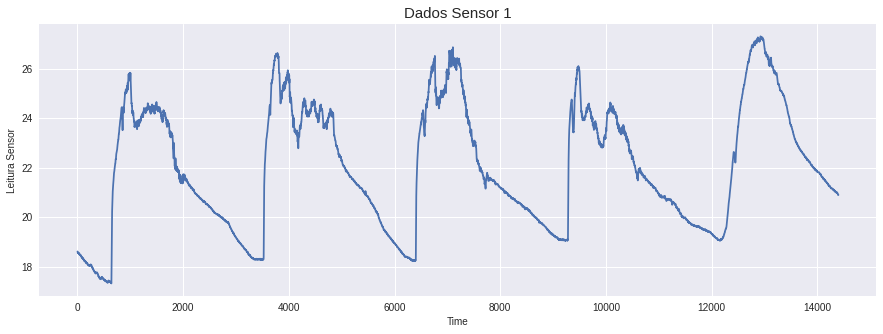

In [4]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Sens[:,0])
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Dados Sensor 1', fontsize=15)
plt.show()

## 2.1. Tratamento do ruido via alisamento exponencial simples

* Tabelas 1 e 2 (52x10) mostram o erro absoluto médio (MAE) entre a série original e a série alisada para 10 valores de $\alpha$ 
\begin{equation}
    MAE = \frac{1}{N}\sum_{i=1}^{N} |S_i - X_i|
\end{equation}

In [5]:
def MAE(list_st_lisa, list_st_normal):
    lista_erro = []
    for i in range(0, np.shape(list_st_lisa)[0]):
        soma = 0
        for j in range(0 , np.shape(list_st_lisa)[1]):

            soma += abs(list_st_lisa[i][j] - list_st_normal[:,i][j]) 
        erro = (1/len(list_st_lisa)) * soma 
        lista_erro.append(erro)

    return lista_erro

* Tratamento do ruido via alisamento exponencial simples \cite{wiki}} O objetivo deste item é implementar e entender o efeito do alisamento exponencial simples para atenuar o ruido numa série temporal. Seja $S(t)$ a versão alisada da série temporal $X(t), t = 1, ..., N$ onde $N$ é o tamanho da série. Então $S(t)$ é obtida de $X(t)$ pela equação:

\begin{equation}
   S(1) = X(1)  
\end{equation}

\begin{equation}
    S(t) = \alpha X(t) + (1 - \alpha) S(t -1), t = 2, ..., N 
\end{equation}

In [ ]:
alfa_valor = [0.157, 0.234, 0.345, 0.456, 0.543, 0.688, 0.734, 0.888, 0.923, 0.999]

list_st_lisa = []
lista_erro_st = []
for i in range(0, len(alfa_valor)): # percorrendo todos os valores de alfa
    
    lista_alisa = []
    
    for j in range(0, Sens.shape[1]): # Percorrendo todos os sensores
        
        list_s = [] #lista criada para cada sensor
        
        list_s.append(Sens[:,j][0]) # pegando primeiro valor da serie
        
        alfa = alfa_valor[i] # pegando o primeiro valor de alfa
        
        for k in range(1, len(Sens[:,0])): # aplicado a formula em serie de um sensor 
            
            s =  (alfa * Sens[:,j][k]) + ((1 - alfa) * list_s[k-1])
            
            list_s.append(s) # Pegando todos os valores de uma serie lisa
            
        lista_alisa.append(list_s) # Pegando todas as series lisas para um alfa
        
    list_st_lisa.append(lista_alisa) # Pegando o daset todo alisado cm um valor de alfa
    erro_st = MAE(lista_alisa, Sens) # Calculando o erro MAE
    lista_erro_st.append(erro_st) # Quando os erros para da alfa
            
    

In [ ]:
print(np.array(list_st_lisa).shape)
print(np.array(lista_erro_st).shape)

In [ ]:
# Salvando dos dados das tabelas
np.savetxt('resultados/2.1/erro_alisa.txt', np.array(lista_erro_st).T, fmt='%4.3f', delimiter='&')

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Sens[:,4][5000:5040],'bo-', label='Origiral data')
plt.plot(list_st_lisa[0][4][5000:5040],'r^-', 
         label='alpha=0.157 MAR='+str(lista_erro_st[0][4])[:5] )
plt.plot(list_st_lisa[4][4][5000:5040],'go-', 
         label='alpha= 0.543 MAR='+str(lista_erro_st[4][4])[:5] )
plt.plot(list_st_lisa[8][4][5000:5040],'c^-', 
         label='alpha=0.923 MAR='+str(lista_erro_st[8][4])[:5])
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Dados Sensor 5 (Série temporal 5)', fontsize=15)
plt.savefig("resultados/2.1/alisa_sensor_5.png", bbox_inches='tight')
plt.show()

## 2.2. Determinação da similaridade espacial (entre séries) baseada na matriz de correlação

* Seja X a matriz de dados. As dimensões de $X$ para o dataset dado é 14400 x 52, ou seja, cada coluna de $X$ é uma série temporal. Sejam $m$ o vetor de médias e $v$ o vetor de variâncias das colunas de $X$, ou seja, as médias e as variâncias das séries temporais. As matrizes de correlação R, de covariâncias C e de coeficientes de correlação $Ro$ são dadas por:

\begin{equation}
     R_X = \frac{1}{5760} X'X = \frac{1}{5760} [ R_{ij} = \sum_{k=1}^{14400} X_{ik}X_{jk} ]
\end{equation}

\begin{equation}
    C_X = \frac{1}{5760} (X - m)'(X - m) = \frac{1}{5760} [ C_{ij} = \sum_{k=1}^{5760} (X_{ik} - m_i)(X_{jk} - m_k) ]
\end{equation}

\begin{equation}
    Ro_X = [ Ro_{ij} = \frac{C_{ij}}{\sqrt{v_iv_j}} ]
\end{equation}

In [ ]:
# Separando os dados em treinamneto e teste
Xtr = Sens[0:5760] # treinamento
Xte = Sens[5760:14400 ] # teste

In [ ]:
R_x = (1/5760) * np.dot(Xtr.T, Xtr)

In [ ]:
R_x.shape

In [ ]:
R_x

In [ ]:
#  Calculando a matriz de covariancia de acordo com a formula
mean_x = np.mean(Xtr, axis=0)
X_central = Xtr - mean_x
C_x = (1/5760) * np.dot(X_central.T, X_central)
print(mean_x.shape)
print(C_x.shape)
C_x

In [ ]:
# Usando o numpy para calcular amtriz de covariancia
cov_x = np.cov(Xtr, rowvar=False)
print(cov_x.shape)
cov_x

In [ ]:
# Calculando o vetor de variância
v = np.var(Xtr, axis=0)
print(v.shape)
v

\begin{equation}
    Ro_X = [ Ro_{ij} = \frac{C_{ij}}{\sqrt{v_iv_j}} ]
\end{equation}

In [ ]:
# Calculando a matriz de coeficente de correção 
Ro_x = []
for i in range(0, 52):
    ro = []
    for j in range(0, 52):
        ro.append(C_x[i][j] / np.sqrt(v[i] * v[j]))
    Ro_x.append(ro)

In [ ]:
Ro_x = np.array(Ro_x)
print(Ro_x.shape)
Ro_x

In [ ]:
# Função para calcular a similaridade entre as series

def simSetMax3(matriz_sim):
    sim_set_max = []
    sim_set_mim = []
    
    for i in range(0, 52):
        list_max_3 = []
        list_mim_3 = []
        
       
        st = list(matriz_sim[i])
        st[i] = 0 # Não pegando os das diagonais principais
        index_max = np.argsort(st)[::-1]
        
        # As 3 mais similares
        list_max_3.append(index_max[0]+1)
        list_max_3.append(index_max[1]+1)
        list_max_3.append(index_max[2]+1)
        
        # As 3 menos similares
        list_mim_3.append(index_max[50]+1)
        list_mim_3.append(index_max[49]+1)
        list_mim_3.append(index_max[48]+1)

        sim_set_max.append(list_max_3) # Pegnado o index da series mais similaries
        sim_set_mim.append(list_mim_3) # Pegnado o index da series menos similaries

    return sim_set_max, sim_set_mim # Retorna o index das 3 series mais similares entre se
    

In [ ]:
# 2 Função para calcular a similaridade entre as series
def simMax3(matriz_sim):
    
    lis_max_st = []
    for i in range(0, np.array(matriz_sim).shape[0]):
        
        list_max3 = []
        
        st = matriz_sim[i]
        
        index_max = np.argsort(st)[::-1]
        
        for k in range(0, len(index_max)):
            if index_max[k] != i:
                list_max3.append(index_max[k]+1)
            if len(list_max3) == 3:
                break
        lis_max_st.append(list_max3)
        
    return lis_max_st
        

In [ ]:
sim_teste,  sim_set_mim= simSetMax3(C_x)
print(len(sim_teste))
print(sim_teste)

In [ ]:
# Um teste para conferir
test_sim_max_cx = simMax3(C_x)
print(test_sim_max_cx)

In [ ]:
# Calculando as 3 seriés mais limilares entre se usando o C_x
sim_max_cx, sim_mim_cx = simSetMax3(C_x)
# Salvando dos dados das tabelas
np.savetxt('resultados/2.2/sim_max_cx.txt', np.array(sim_max_cx), fmt='%4.f', delimiter='&')
np.savetxt('resultados/2.2/sim_mim_cx.txt', np.array(sim_mim_cx), fmt='%4.f', delimiter='&')
print(sim_max_cx[24])
print(sim_mim_cx[24])

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtr[:,24][:],'b', label='ST 25')
plt.plot(Xtr[:,18][:],'r', 
         label='A mais similar ST 19')
plt.plot(Xtr[:,22][:],'g', 
         label='A segunda mais similar ST 23')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST mais similares a ST 25 pelo critério C', fontsize=15)
plt.savefig("resultados/2.2/sim_c_max.png", bbox_inches='tight')
plt.show()

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtr[:,24][:],'b', label='ST 25')
plt.plot(Xtr[:,32][:],'r', 
         label='A menos similar ST 33')
plt.plot(Xtr[:,33][:],'g', 
         label='A segunda menos similar ST 34')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST menos similares a ST 25 pelo critério C', fontsize=15)
plt.savefig("resultados/2.2/sim_c_mim.png", bbox_inches='tight')
plt.show()

In [ ]:
# Calculando as 3 seriés mais limilares entre se usando o R_x
sim_max_rx, sim_mim_rx = simSetMax3(R_x)
# Salvando os dados das tabelas
np.savetxt('resultados/2.2/sim_max_rx.txt', np.array(sim_max_rx), fmt='%4.f', delimiter='&')
np.savetxt('resultados/2.2/sim_mim_rx.txt', np.array(sim_mim_rx), fmt='%4.f', delimiter='&')
print(sim_max_rx[40])
print(sim_mim_rx[40])

In [ ]:
# Calculando as 3 seriés mais limilares entre se usando o Ro_x
sim_max_rox, sim_mim_rox = simSetMax3(Ro_x)
np.savetxt('resultados/2.2/sim_max_rox.txt', np.array(sim_max_rox), fmt='%4.f', delimiter='&')
np.savetxt('resultados/2.2/sim_mim_rox.txt', np.array(sim_mim_rox), fmt='%4.f', delimiter='&')
print(sim_max_rox[4])
print(sim_mim_rox[4])

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtr[:,4][:],'b', label='ST 5')
plt.plot(Xtr[:,9][:],'r', 
         label='A mais similar ST 10')
plt.plot(Xtr[:,5][:],'g', 
         label='A segunda mais similar ST 6')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST mais similares a ST 5 pelo critério Ro', fontsize=15)
plt.savefig("resultados/2.2/sim_ro_max.png", bbox_inches='tight')
plt.show()

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtr[:,4][:],'b', label='ST 5')
plt.plot(Xtr[:,33][:],'r', 
         label='A meno similar da ST 34')
plt.plot(Xtr[:,44][:],'g', 
         label='A segunda mwnos similar ST 45')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST menos similares a ST 5 pelo critério Ro', fontsize=15)
plt.savefig("resultados/2.2/sim_ro_mim.png", bbox_inches='tight')
plt.show()

## 2.3.1. Imputação com estimação espacial

Na Seção 2.2 foi obtida a lista das três STs mais correlacionadas com cada uma das séries. De forma genérica, sejam  ́$st_{.,u}, st_{.,v} e st_{.,w}$ as STs com maior correlação com $st_{.,i}$. Então forme a matriz $Xtr_i = [st_{.,i}, st_{.,u}, st_{.,v}, st_{.,w}]$, ou seja, as STs são as colunas de $Xtr_i$. Pelo método da subseção 2.2 obtenha $m_i$, o vetor de médias, e $C_{X_i}, i = 1, ..., M$, a matriz de covariâncias. Selecione aleatoriamente 10\% dos pontos em cada ST do conjunto de teste Xte como pontos ausentes e aplique o Teorema 12.7 para estimar os valores nestes pontos. Construa uma tabela do MAE para os pontos de teste ausentes comparando esta técnica de estimação espacial com as imputações pela média e pela repetiçãoo do ultimo valor recebido. Inclua no relatório tabelas, figuras, códigos e discussão no modelo fornecido para as Seções 2.1 e 2.2.

* Usando o criterio de similaridade $Ro$

In [ ]:
# Xte  Dados de teste
# Xtr  Dados de treinamneto 
# As três mais similares usando o Ro sim_max_rox 
# As três mais similares usando o C sim_max_cx 
# As três mais similares usando o R sim_max_rx 


# Função para encontrar a matriz Xtr_i item 2.3.1
def StMax3(Xtr,list_max_sim):
    
    Xtr_i = []
    # Percorrendo as 52 series temporais
    for i in range(0, Xtr.shape[1]):
        # Pegando as 3 mais similares de cada uma das 52 series
        max_st3 = list_max_sim[i]
        # Aqui vai as 4 series temporais [st.,i, st.,u, st.,v, st.,w]
        list_st_sim = []
        # Pgando a serie st.,i
        list_st_sim.append(Xtr[:,i])
        
        # Pegando as series st.,u, st.,v, st.,w
        for j in range(0, len(max_st3)):
            list_st_sim.append(Xtr[:,max_st3[j]-1])
        # Junatdo as lista Xtr_i
        Xtr_i.append(list_st_sim)
    
    return np.array(Xtr_i)
    

In [ ]:
# Criado a matrizes Xtr_i com as três mais similares usando o Ro sim_max_rox 
mat_Xtr_i_Ro = StMax3(Xtr, sim_max_rox)
print(mat_Xtr_i_Ro.shape)
print(mat_Xtr_i_Ro[0].shape)

In [ ]:
print(mat_Xtr_i_Ro[0])

In [ ]:
print(mat_Xtr_i_Ro[1])

In [ ]:
# Função para obter o vetor m_i e matriz Cx_i
def meanCxM(Xtr_i):
    list_Cx_i = []
    list_mi = []
    for i in range(0, 52):
        Str_i =  Xtr_i[i].T # Transformando para [5760, 4]
        # Encontrado o vetor m_i da Xtr_i
        m_i = np.mean(Str_i, axis=0)
        # Criando a matriz Cx_i
        Str_i_central = Str_i - m_i
        Cx_i = (1/5760) * np.dot(Str_i_central.T, Str_i_central)
        # juntando matriz com todos os Cx_i
        list_Cx_i.append(Cx_i)
        list_mi.append(m_i)
        
    return  np.array(list_Cx_i), np.array(list_mi) # Retorna matriz com todos os Cx_i e m_i
    

In [ ]:
list_Cx_i_Ro, list_mi = meanCxM(mat_Xtr_i_Ro)
print(list_Cx_i_Ro.shape)

In [ ]:
list_Cx_i_Ro[0]

In [ ]:
list_Cx_i_Ro[1]

In [ ]:
list_Cx_i_Ro[51]

### Aplicando o teorema 12.7

\begin{equation}
    \hat{X} = a'Y+b
\end{equation}

\begin{equation}
    Y = [X_1, X_2,X_3]
\end{equation}

\begin{equation}
    a' = C_{X,Y}C_{Y}^{-1}
\end{equation}

\begin{equation}
    b = E[X]-C_{X,Y}C_{Y}^{-1}E[Y] = E[X] - a'E[Y]
\end{equation}


In [ ]:
def estimaLinear(mat_cov, mat_m):
    estima_x = []
    for i in range(0, 52): 
        # Encontrado a o valor esperado E[Y] (Media)
        E_Y = mat_m[i][1:]
        # Encontrado a matriz de covariancia de CY em C_X
        C_Y = mat_cov[i].copy()
        C_Y =  np.delete(C_Y, [0], axis=0) # removendo a linha de i
        C_Y =  np.delete(C_Y, [0], axis=1) # removendo a coluna de i
        C_x_y = mat_cov[i][1:,0] # matriz cruzada
        # Calculando o coeficiente a'
        a = np.dot(C_x_y, np.linalg.inv(C_Y))
        # Calculando o coeficente b
        b = mat_m[i][0] - np.dot(a.T, E_Y)
        
        estima_x.append([a, b])
    # Retorna os coefientes  de estimativa (a, b) de cada serie
    return estima_x
    

In [ ]:
# Funcao para simular os 10% dos dados faltosos
def imputaData(data_test):
    # pegando os 10% de teste
    n = 0.10 * data_test.shape[0]
    rng = np.random.default_rng()
    list_index = []
    for i in range(0, 52):
        # Pegando 10% dos index de forma aleatoria de todas as series 
        indexs = rng.choice(range(3, data_test.shape[0]), size=(int(n)), replace=False)
        list_index.append(list(indexs))
    # Retorna as posicao das imputacao
    return list_index

In [ ]:
# Estimação espacial
# Estimendo os valores amputados
def estimaVal(coe_estima, posi_imput, index_sim_max3, dados_test):
    dados_test = dados_test.T # Transformnado para de 5760x52 para 52x5760
    novos_dados = dados_test.copy()
    for i in range(0, 52):
        a = coe_estima[i][0] # Coeficiente a 1x3 da serie i
        b = coe_estima[i][1] # Coeficiente b 1x1 ca serie i
        # Estimar todos os dados imputados da serie i
        for j in posi_imput[i]:
            Y = []
            Y.append(dados_test[index_sim_max3[i][0]-1][j])
            Y.append(dados_test[index_sim_max3[i][1]-1][j])
            Y.append(dados_test[index_sim_max3[i][2]-1][j])
            # Estimando o valor cm os coeficentes da serie i
            X_i = np.dot(a.T, Y) + b
            # Substituido os dados pela estimativa 
            novos_dados[i][j] = X_i
    # Retornando os dados de teste com os valores imputados substituidos        
    return novos_dados

In [ ]:
# Colculando os coeficientes ('a, b) para todas as series
coe_estima_x = estimaLinear(list_Cx_i_Ro, list_mi)

In [ ]:
# Estimando os novos dados de testes
index_data_imput = imputaData(Xte) # Simulando a falta de dados
esti_dados_test = estimaVal(coe_estima_x, index_data_imput, sim_max_rox, Xte)

In [ ]:
# Calculando o erro 
erro_estima = MAE(esti_dados_test, Xte)
print(erro_estima)

In [ ]:
# Serie normal
plt.figure(figsize=(15,5))
plt.plot(esti_dados_test[8][6000:8000], 'r', 
         label='Estimativa temporal MAE = '+str(erro_estima[8])[:5])
plt.plot(Xte[0:,8][6000:8000],'b', label='Dados originais')
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.legend()
plt.title('Estimação espacial de valores ausentes nos dados de teste (Sensor 1)', fontsize=15)
plt.savefig("resultados/2.3/estima_espacial.png", bbox_inches='tight')
plt.show()

In [ ]:
# Estimativa por media dos dados de treinamento
# Estimativa por valor anterio
def estiMean(dados_test, index_imput, vetor_medias):
    dodos_esti_mean = dados_test.T.copy()
    dodos_esti_valor = dados_test.T.copy()
    for i in range(0, 52):
        st_index = sorted(index_imput[i])
        for j in st_index:
            # Substituindo os dados pela media
            dodos_esti_mean[i][j] = vetor_medias[i][0]
            # Substituindo pelo valor anterior
            dodos_esti_valor[i][j] = dodos_esti_valor[i][j-1]
    return dodos_esti_valor, dodos_esti_mean

In [ ]:
esti_val_anterior, esti_media = estiMean(Xte, index_data_imput, list_mi)

In [ ]:
# Calculando o erro da media
erro_est_media = MAE(esti_media, Xte)
print(erro_est_media)

In [ ]:
# Calculando o erro com a substituicao com o valor anterior
erro_est_val = MAE(esti_val_anterior, Xte)
print(erro_est_val)

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(esti_media[8][6000:8000],'r', 
         label='Estimativa por média MAE = '+str(erro_est_media[8])[:5])
plt.plot(Xte[0:,8][6000:8000],'b', label='Dados originais')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Estimação por média de dados ausentes(Sensor 1)', fontsize=15)
plt.savefig("resultados/2.3/estima_media.png", bbox_inches='tight')
plt.show()

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(esti_val_anterior[8][6000:8000],color='r', 
         label='Estimativa valor anterior MAE = '+str(erro_est_val[8])[:5])
plt.plot(Xte[0:,8][6000:8000],'b', label='Dados originais')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Estimação por valor anterior de dados ausentes (Sensor 1)', fontsize=15)
plt.savefig("resultados/2.3/estima_media.png", bbox_inches='tight')
plt.show()

### 2.3.2. Imputação com estimação temporal
Na imputação com estimação temporal, repete-se o mesmo procedimento da subseção 2.3.1 sendo a diferença em como $Xtr_i$ é obtida. Neste caso, $Xtr_i$ e formada por $st_{i,.}$ e
versães de $st_{i,.}$ atrasadas no tempo, ou seja, $Xtr_j = [st_{i,j} , st_{i−1,j} , st_{i−2,j} , st_{i−3,j} ]$. Todo orestante do procedimento é o mesmo da subseção 2.3.1.

In [ ]:

# Realizando o atraso nas series (Xtrj)
Xtrj = []
for j in range(0, 52): # As 52 series
    stj = Xtr[:,j]
    st_atra_3 = []
    st_atra_3.append(stj)
    # Os tres valores de atraso
    for k in range(1, 4): #  k = 1, 2, 3
        stj_atra = []
        # 0 a 5760, percorrendo todos os valores da serie
        for i in range(0, stj.shape[0]):
            stj_atra.append(stj[i-k])
        # Pegando a serie atrasada com -1, -2, -3
        st_atra_3.append(stj_atra)
    # Adicionando a serie j e as tres atrasadas
    Xtrj.append(st_atra_3)
            

In [ ]:
np.array(Xtrj).shape

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtrj[0][0][1020:1100],'b', label='Dados originais')
plt.plot(Xtrj[0][1][1020:1100],'g', 
         label='Série com atraso em -1')
plt.plot(Xtrj[0][2][1020:1100],'r', 
         label='Série com atraso em -2')

plt.plot(Xtrj[0][3][1020:1100],color='orange', 
         label='Série com atraso em -3')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Atrasando a série no tempo (Sensor 1)', fontsize=15)
plt.savefig("resultados/2.3/atrso_temp01.png", bbox_inches='tight')
plt.show()

In [ ]:
# Criando as matrizes de covariancia da estimacao temporal
Xtrj = np.array(Xtrj)
list_Cx_j_Ro, list_mj = meanCxM(Xtrj)

In [ ]:
list_Cx_j_Ro[0]

In [ ]:
# Colculando os coeficientes ('a, b) para todas as series atrasadas 
coe_estima_xj = estimaLinear(list_Cx_j_Ro, list_mj)

In [ ]:
# Estimendo os valores amputados (Estimação temporal)
def estTem(coe_estima, dados_test, posi_imput):
    novos_dados = dados_test.T.copy()
    dados_test = dados_test.T
    for i in range(0, 52):
        a = coe_estima[i][0] # Coeficiente a 1x3 da serie i
        b = coe_estima[i][1] # Coeficiente b 1x1 ca serie i
        index_imput = sorted(posi_imput[i]) # Os index de onde foram imputados os dados da serie i
        # Estimar todos os dados imputados da serie i
        for j in index_imput:
            Y = []
            Y.append(dados_test[i][j-1])
            Y.append(dados_test[i][j-2])
            Y.append(dados_test[i][j-3])
            # Estimando o valor cm os coeficentes da serie i
            X_i = np.dot(a.T, Y) + b
            # Substituido os dados faltosos pela estimativa 
            novos_dados[i][j] = X_i
    # Retornando os dados de teste com os valores imputados substituidos        
    return novos_dados

In [ ]:
# Estimando os novos dados de testes (estimacao temporal)
est_temp_dados_test = estTem(coe_estima_xj, Xte, index_data_imput)

In [ ]:
# Calculando o erro com a estimacao temporal
erro_est_temp = MAE(est_temp_dados_test, Xte)
print(erro_est_temp)

In [ ]:
sum(erro_est_temp)/52

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xte[0:,0][700:1000],'g', label='Dados originais')
plt.plot(est_temp_dados_test[0][700:1000],'r', 
         label='Estimativa temporal MAE = '+str(erro_est_temp[0])[:5])
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Estimação temporal de valores ausentes nos dados de teste (Sensor 1)', fontsize=15)
plt.savefig("resultados/2.3/estima_temp.png", bbox_inches='tight')
plt.show()

### 2.3.2. Imputação com estimação espaço-temporal
Na imputação com estimação temporal, repete-se o mesmo procedimento da subseção 2.3.1 sendo a diferença em como $Xtr_j$ é obtida. Neste caso, $Xtr_i$ e formada por $st_{j,.}$ e
versães de $st_{j,.}$ atrasadas no tempo, em parelhadas com $st_{.,u}, st_{.,v}, st_{.,w} $, ou seja,   $Xtr_{ij} = [st_{i,j} , st_{i−1,j} , st_{i−2,j} , st_{i−3,j}, st_{i,u}, st_{i,v}, st_{i,w} ]$. Todo orestante do procedimento é o mesmo da subseção 2.3.1.

In [ ]:
# Emparelhando as series em uma matriz 
#st_{i,j} , st_{i−1,j} , st_{i−2,j} , st_{i−3,j}, st_{i,u}, st_{i,v}, st_{i,w}

In [ ]:
#Xtrj  Series atrazadas no tempo
#mat_Xtr_i_Ro  Series mais similares 
Xtri = mat_Xtr_i_Ro

list_Cx_ji = []

for i in range(0, 52):
    list_Cx_ji7 = []
    list_Cx_ji7.append(mat_Xtr_i_Ro[i][0])
    
    for j in range(1, 4): # j = 1, 2, 3
        list_Cx_ji7.append(mat_Xtr_i_Ro[i][j])
    
    for l in range(1, 4): # j = 1, 2, 3
        list_Cx_ji7.append(Xtrj[i][l])
    
    list_Cx_ji.append(list_Cx_ji7) # (52, 7, 5760)
        

In [ ]:
list_Cx_ji = np.array(list_Cx_ji)
list_Cx_ji.shape

In [ ]:
# Criando as matrizes de covariancia da estimacao espaco-temporal
list_Cx_ij_Ro, list_mij = meanCxM(list_Cx_ji)
list_Cx_ij_Ro.shape

In [ ]:
list_Cx_ij_Ro[0]

In [ ]:
# Estimendo os valores amputados
def estEspTem(coe_estima, posi_imput, index_sim_max3, dados_test):
    dados_test = dados_test.T # Transformnado para de 5760x52 para 52x5760
    novos_dados = dados_test.copy()
    for i in range(0, 52):
        
        a = coe_estima[i][0] # Coeficiente a 1x3 da serie i
        b = coe_estima[i][1] # Coeficiente b 1x1 ca serie i
        index_imput = sorted(posi_imput[i]) 
        # Estimar todos os dados imputados da serie i
        for j in posi_imput[i]:
            Y = []
            # Pegando os valores das similares
            Y.append(dados_test[index_sim_max3[i][0]-1][j])
            Y.append(dados_test[index_sim_max3[i][0]-1][j])
            Y.append(dados_test[index_sim_max3[i][0]-1][j])
            # Pegando os valores atrazados
            Y.append(dados_test[i][j-1])
            Y.append(dados_test[i][j-2])
            Y.append(dados_test[i][j-3])
            # Estimando o valor cm os coeficentes da serie i
            X_i = np.dot(a.T, Y) + b
            # Substituido os dados faltosos pela estimativa 
            novos_dados[i][j] = X_i
    # Retornando os dados de teste com os valores imputados substituidos        
    return novos_dados

In [ ]:
# Colculando os coeficientes ('a, b) para todas as series 
coe_estima_xij = estimaLinear(list_Cx_ij_Ro, list_mij)
# Estimando os novos dados de testes (estimacao temporal)
est_esp_temp_dados = estEspTem(coe_estima_xij, index_data_imput, sim_max_rox, Xte)

In [ ]:
# Calculando o erro com a estimacao temporal
erro_est_esp_temp = MAE(est_esp_temp_dados, Xte)
print(erro_est_esp_temp)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(est_esp_temp_dados[0][700:1000], 'g', label='Dados originais')
plt.plot(Xte[:,0][700:1000], 'r', 
         label='Estimativa espaço-temporal MAE = '+str(erro_est_esp_temp[0])[:5])
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.legend()
plt.title('Estimação espaço-temporal de valores ausentes nos dados de teste (Sensor 1)', fontsize=15)
plt.savefig("resultados/2.3/estima_espa-temp.png", bbox_inches='tight')
plt.show()

In [ ]:
sum(erro_est_esp_temp)/52

In [ ]:
# Salvando os dados das tebelas do item 2.3
estima_txt = []
estima_txt.append(erro_estima)
estima_txt.append(erro_est_media)
estima_txt.append(erro_est_val)
estima_txt.append(erro_est_temp)
estima_txt.append(erro_est_esp_temp)
estima_txt = np.array(estima_txt)
np.savetxt('resultados/2.3/estima_erro_01.txt', estima_txt.T, fmt='%4.3f', delimiter='&')